# Esercitazione 12

## Esercizio 1

Utilizzo due ottimizzatori diversi da sgd: Adam e Adagrad. 

Importo le librerie necessarie e inizializzo il generatore di numeri casuali.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

seed=278
np.random.seed(seed) 
tf.random.set_seed(seed)

Importo il dataset e divido i dati in training e test.

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 2s 0us/step
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 6


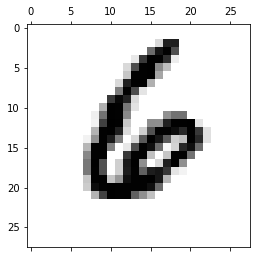

an example of a data point with label 6 before to_categorical ...
... and with label [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[13])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[13,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[13], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[13], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

Scrivo una funzione con la quale creare la rete neurale. Riduco progressivamente il numero di neuroni e vario la funzione di attivazione, scegliendo softmax per l'ultimo layer.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


# Ottimizzazione con Adam

Eseguo una ottimizzazione utilizzando Adam, anzichè una semplice SGD. utilizzo la _cross entropy_ come loss function, adatta ai problemi di classificazione. Come metrica utilizzo l'accuratezza della predizione, ovvero quante volte risulta corretta.

In [5]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model_Adam():
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Avendo osservato che 5 epoche risultano insufficienti per avere una precisione soddisfacente, e che si è ancora lontani dalla situazione di overfitting, decido di procedere con 20 epoche.

In [6]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model_Adam()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size,
          epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20


2022-01-11 10:49:40.694286: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-11 10:49:40.694482: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-11 10:49:40.694792: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-01-11 10:49:40.802676: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-11 10:49:40.825182: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2803200000 Hz


1875/1875 [==============================] - 15s 8ms/step - loss: 0.4855 - accuracy: 0.8529 - val_loss: 0.1200 - val_accuracy: 0.9641
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1255 - accuracy: 0.9644 - val_loss: 0.0798 - val_accuracy: 0.9758
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0896 - accuracy: 0.9746 - val_loss: 0.0777 - val_accuracy: 0.9772
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0659 - accuracy: 0.9809 - val_loss: 0.0751 - val_accuracy: 0.9776
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0512 - accuracy: 0.9851 - val_loss: 0.0805 - val_accuracy: 0.9792
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0450 - accuracy: 0.9856 - val_loss: 0.0753 - val_accuracy: 0.9804
Epoch 7/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0846 - val_accuracy: 0.

313/313 [==============================] - 1s 1ms/step - loss: 0.1342 - accuracy: 0.9809


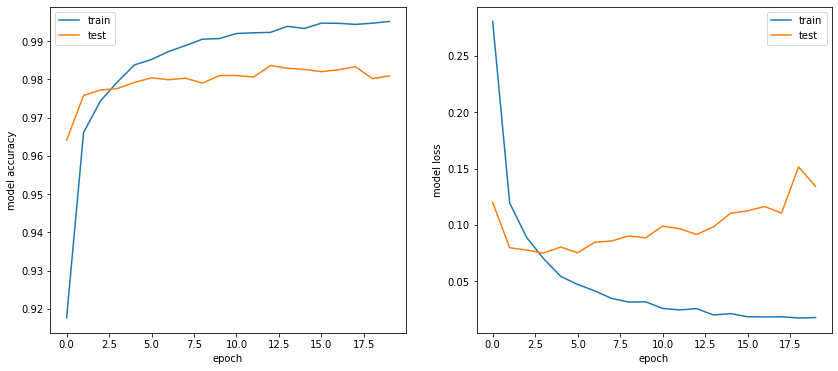

In [7]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

fig = plt.figure(figsize=[14,6])

# summarize history for accuracy
ax1 = fig.add_subplot(121)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('model accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')

# summarize history for loss
ax2 = fig.add_subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='best')

Da questo grafico posso osservare che, come è normale che sia, l'errore sul set di test risulta più alto rispetto a quello di training. Si inizi a notare un graduale aumento della loss già dalla quinta epoca, segno che il modello diventa persino troppo complesso e si rischia l'overfitting.

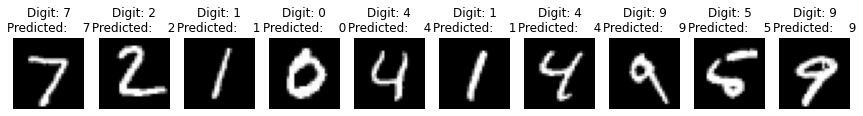

In [8]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Valutando il modello su questi pochi singoli numeri, osservo che la performance è buona: c'è un solo errore su 10 predizioni, che peraltro avrebbe forse commesso persino un umano.

# Ottimizzazione con Adagrad

Eseguo ora una ottimizzazione utilizzando Adagrad. Definisco una nuova funzione _compile_model_Adagrad_ e procedo come fatto con Adam.

In [9]:
def compile_model_Adagrad():
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(), metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [10]:
batch_size = 32
epochs = 20

model_DNN = compile_model_Adagrad()

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

history = model_DNN.fit(X_train, Y_train, batch_size=batch_size,
          epochs=epochs,verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7239 - accuracy: 0.4577 - val_loss: 0.6211 - val_accuracy: 0.8587
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7558 - accuracy: 0.7821 - val_loss: 0.4408 - val_accuracy: 0.8914
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5821 - accuracy: 0.8329 - val_loss: 0.3739 - val_accuracy: 0.9042
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5120 - accuracy: 0.8515 - val_loss: 0.3403 - val_accuracy: 0.9102
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4641 - accuracy: 0.8698 - val_loss: 0.3159 - val_accuracy: 0.9157
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4435 - accuracy: 0.8735 - val_loss: 0.2988 - val_accuracy: 0.9202
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4158 - accuracy: 0.8819 - val_loss: 0.2846 - val_accur

313/313 [==============================] - 0s 1ms/step - loss: 0.2056 - accuracy: 0.9418


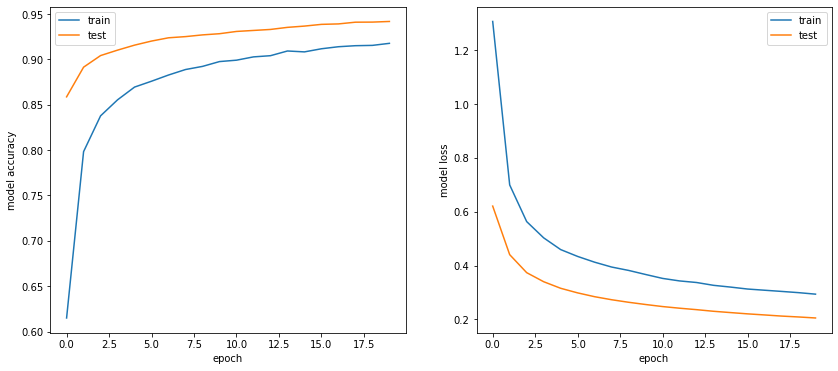

In [11]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

fig = plt.figure(figsize=[14,6])

# summarize history for accuracy
ax1 = fig.add_subplot(121)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('model accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')

# summarize history for loss
ax2 = fig.add_subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='best')

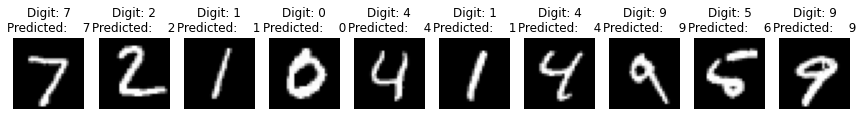

In [12]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Viene commesso lo stesso errore del caso precedente, che di nuovo reputo accettabile.

## Esercizio 2: CNN

Ora vario l'architettura della rete, costruendone una convoluzionale. Inizio ripetendo quando fatto nell'esercizio 11.1.

In [13]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 784)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Aggiungo vari strati alla rete convoluzionale: eseguo dei _pooling_, _Flatten_ e concludo con un _Dropout_ prima di ottenere il risultato finale tramite una _softmax_, che è forse la miglior scelta per la funzione di attivazione finale in un problema di classificazione di questo tipo.

In [14]:
def create_CNN():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5),activation='elu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(80, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,optimizer='SGD',metrics=['accuracy'])
    return model

Ora, alleno e testo la rete.

In [15]:
# training parameters
batch_size = 32
epochs = 20
model_CNN = create_CNN()
model_CNN.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Final test loss:', score[0])
print('Final test accuracy:', score[1])

Epoch 1/20
1875/1875 [==============================] - 63s 33ms/step - loss: 1.1852 - accuracy: 0.6100 - val_loss: 0.1534 - val_accuracy: 0.9541
Epoch 2/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2473 - accuracy: 0.9283 - val_loss: 0.0978 - val_accuracy: 0.9692
Epoch 3/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1666 - accuracy: 0.9525 - val_loss: 0.0719 - val_accuracy: 0.9762
Epoch 4/20
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1289 - accuracy: 0.9628 - val_loss: 0.0615 - val_accuracy: 0.9815
Epoch 5/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1123 - accuracy: 0.9677 - val_loss: 0.0551 - val_accuracy: 0.9824
Epoch 6/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0994 - accuracy: 0.9715 - val_loss: 0.0512 - val_accuracy: 0.9838
Epoch 7/20
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0848 - accuracy: 0.9748 - val_loss: 0.0522 -

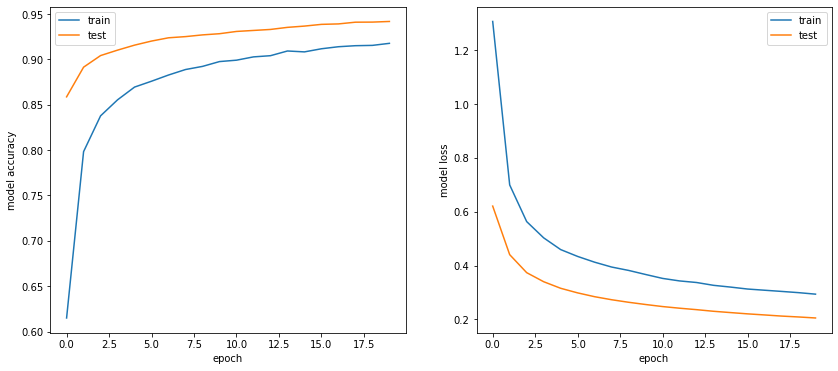

In [16]:
fig = plt.figure(figsize=[14,6])

# summarize history for accuracy
ax1 = fig.add_subplot(121)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('model accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')

# summarize history for loss
ax2 = fig.add_subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='best')

## Esercizio 3
Ora utilizzo dei numeri da me disegnati con gimp per vedere se la predizione della mia rete allenata risulta corretta.

Image size: 28x28 pixels
(28, 28)


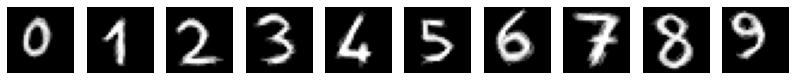

In [17]:
from PIL import Image
fig = plt.figure(figsize=[14,6])
data = []

for num in range (10):
    data.append(np.array(np.zeros((28,28))))
                
for num in range (10):
    digit_filename = "./es12/num"+str(num)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();

    for j in range(ydim):
        for i in range(xdim):
            data[num][i,j]=pix[j,i]

    data[num] /= 255

    axs = fig.add_subplot(1,10, num+1)    
    axs.imshow(data[num], cmap='gray')
    axs.axis('off')

print("Image size: "+str(xdim)+"x"+str(ydim)+" pixels")
print(data[1].shape)## Esercizio 3

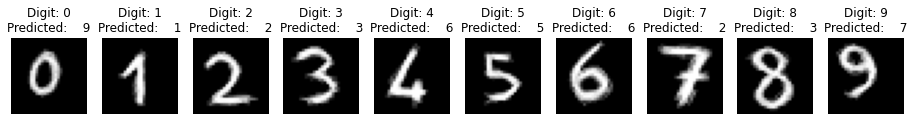

In [18]:
fig = plt.figure(figsize=[16,6])

for num in range(10):
    this_data = data[num].reshape(1,xdim*ydim)
    pred_0 = model_DNN.predict(this_data)
    plot_data = this_data.reshape(xdim,ydim)

    axs = fig.add_subplot(1,10, num+1)    
    axs.imshow(plot_data, cmap='gray')    
    axs.set_title("Digit: {}\nPredicted:    {}".format(num, np.argmax(pred_0)))    
    axs.axis('off') 
    del (this_data)

Purtroppo con i numeri scritti da me la rete non funziona a dovere, presentando un'accuratezza del 50%. Mi sento però di dare la colpa più alla mia pessima scrittura che alla rete neurale. I numeri scritti da me con gimp, anche se visivamente simili a quelli del _mnist_ dataset, probabilmente a livello di pixel sono particolarmente diversi. 